In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [229]:
#df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
#df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Orth_Scores_Ldgs.xlsx', sheet_name='Scores') 
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Scores.xlsx', sheet_name='Sheet1') 
df.head()

,sample,sample1,trt_time,Scores on Comp 2 (16.16%),Scores on Comp 3 (72.38%),Scores on Comp 4 (9.14%)
0,Ctrl,Control,20mins,0.010710,0.023410,0.006529
1,Ctrl,Control,20mins,0.011956,0.027149,0.004772
2,Ctrl,Control,20mins,0.004669,0.032320,0.010738
3,Ctrl,Control,20mins,0.020306,0.010525,0.009614
4,Ctrl,Control,20mins,0.014931,0.014209,0.009699


In [219]:

data = []
for x in ['2mins','20mins', '40mins', '60mins']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (16.16%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 2 (16.16%)'],
                            groups=dff['sample'],
                            alpha=0.05
                            )
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

0.000664901097565593
0.1155164845318068
0.15567462639138768
0.25458823339870296


In [220]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,0.0011,0.5858,-0.0029,0.0051,False,ns
1,Ctrl,Trt,-0.0041,0.0080,-0.0070,-0.0011,True,**
2,Ctrl,Trt,-0.0037,0.0029,-0.0061,-0.0013,True,**
3,Ctrl,Trt,-0.0054,0.0000,-0.0076,-0.0032,True,**


In [ ]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

"for l in [1.5, 3.5, 5.5, 7.5]:\n    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)"

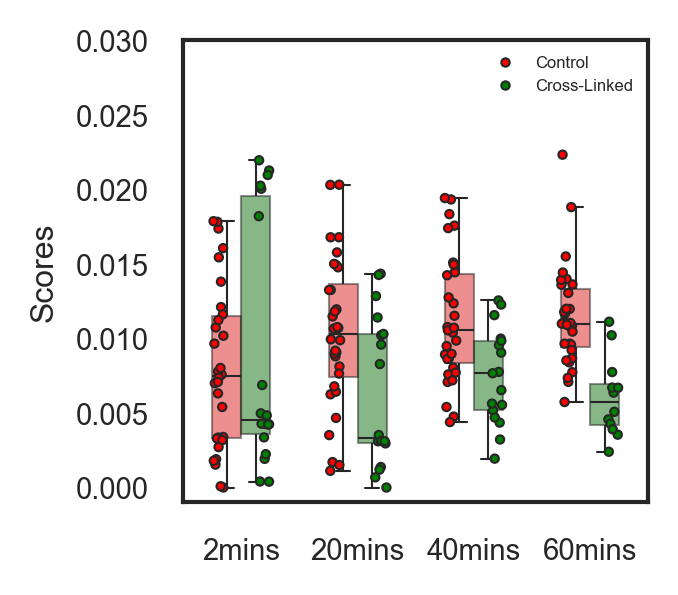

In [231]:
#df[df['trt_time'].isin(['2mins', '20mins', '40mins', '60mins'])]
sns.set_theme(context = 'paper', font_scale = .8, style = 'white', rc={"patch.linewidth": 1.0})
plt.figure(figsize = (2, 2), dpi = 300);
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 2 (16.16%)',
    data = df,
    hue = 'sample1',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       palette = ['red','green'],
       width = .5,
    showfliers = False,
    boxprops=dict(alpha=0.5),
    legend = False
    #fill = False
);
sns.stripplot(
    x = 'trt_time',
    y = 'Scores on Comp 2 (16.16%)',
    data = df,
    hue = 'sample1',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       palette = ['red','green'],
    size = 2,
);
plt.xlabel('')
plt.ylabel('MCR Concentration (a.u.)')
plt.legend(title = '', frameon = False, fontsize = 4)#, labels=['Control', 'Cross-Linked']
plt.ylim(-0.001, .03)


#plt.xticks([0.3]) 
#ax.set_xticks(positions)
plt.ylabel('Scores');
#plt.axvline(-0.25)
'''for l in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)'''

In [ ]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (16.16%)'])[1]}")
    tukey = pg.pairwise_gameshowell(
        data = dff,
        dv='Scores on Comp 2 (16.16%)',
                            between='sample'
                            ).round(3)
    #display results
    print(f"Results for {x}")
    print(tukey)
    print('*****************************************************')
    data1.append(tukey)

### Loadings Plot

In [185]:
ldgs = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Orth_Scores_Ldgs.xlsx', sheet_name='Ldgs') #Para_Ldgs1.xlsx', sheet_name='Sheet1'
ldgs.head()

,Trt,Comp. 1 (0.86%),Comp. 2 (63.61%),Comp. 3 (3.32%),Comp. 4 (31.78%),Unnamed: 5,Ctrl,Comp. 1 (5.46%),Comp. 2 (8.19%),Comp. 3 (52.75%),Comp. 4 (33.35%),Unnamed: 11,Unnamed: 12,Collagen diff,Coll+glass diff,AR_Trt,AR_Ctrl
0,753.117,0.011190,0.011376,0.010163,0.005218,NaN,753.117,0.011190,0.018821,0.007573,0.006864,NaN,753.117,0.003803,-0.001646,2.241058,1.326697
1,754.260,0.011327,0.013110,0.010534,0.005429,NaN,754.260,0.011327,0.018491,0.010091,0.006934,NaN,754.260,0.003019,-0.001505,1.944603,1.350378
2,755.404,0.011498,0.014668,0.010902,0.005613,NaN,755.404,0.011498,0.018192,0.012379,0.006976,NaN,755.404,0.002290,-0.001363,1.738061,1.372565
3,756.546,0.011668,0.016050,0.011265,0.005770,NaN,756.546,0.011668,0.017924,0.014437,0.006990,NaN,756.546,0.001614,-0.001220,1.588416,1.393063
4,757.688,0.011864,0.017256,0.011625,0.005901,NaN,757.688,0.011864,0.017688,0.016264,0.006977,NaN,757.688,0.000992,-0.001076,1.477435,1.411690


In [186]:
spec = ldgs[['Comp. 2 (63.61%)', 'Comp. 3 (52.75%)']]
spec.head()

,Comp. 2 (63.61%),Comp. 3 (52.75%)
0,0.011376,0.007573
1,0.013110,0.010091
2,0.014668,0.012379
3,0.016050,0.014437
4,0.017256,0.016264


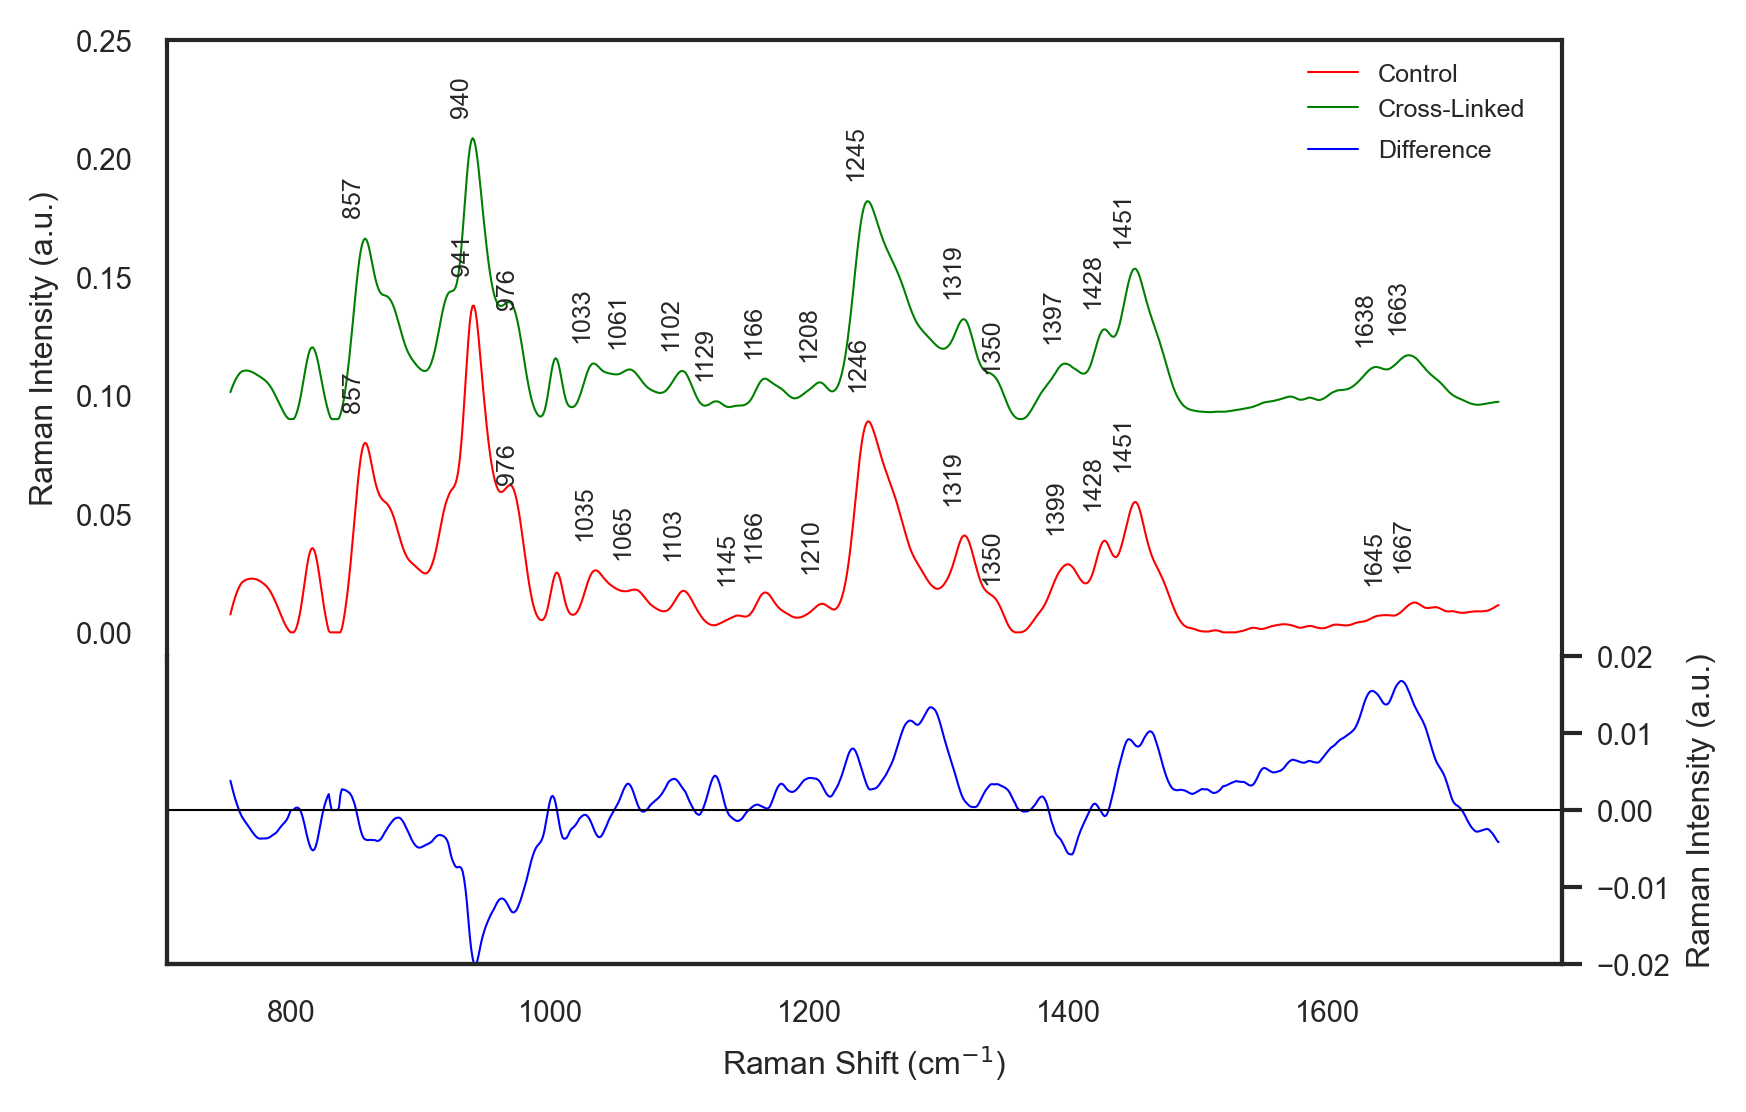

In [187]:
#plt.figure(figsize = (8, 4), dpi = 300)
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(6, 4),
    sharex=True,
    gridspec_kw={"hspace": 0.00, 'height_ratios': [2, 1]},
    dpi = 300
)

ax1, ax2= axes
sns.lineplot(
    x = 'Ctrl',
    y = 'Comp. 3 (52.75%)',
    data = ldgs,
    label = 'Control',
    color = 'red',
    lw = .5,
    ax = ax1
)
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Comp. 2 (63.61%)'] + .09,
    data = ldgs,
    label = 'Cross-Linked',
    color = 'green',
    lw = .5,
    ax = ax1
)
ax2_r = ax2.twinx()
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Collagen diff'], #- 1.02,
    data = ldgs,
    label = 'Difference',
    color = 'blue',
    lw = .5,
      ax = ax2_r
)

ax2.yaxis.set_visible(False)
ax2_r. set_ylim(-.02, .02)
ax2_r.set_ylabel('Raman Intensity (a.u.)')
ax2_r.axhline(0, lw = .5, color = 'black')
ax2_r.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel("Raman Shift (cm$^{-1}$)")

ax1.set_ylabel('Raman Intensity (a.u.)')
ax1.set_ylim(-.01, .25)
ax1.spines['bottom'].set_visible(False)

ax1.legend(frameon = False, fontsize = 6, bbox_to_anchor  =(.99, 1))
ax2_r.legend(frameon = False, bbox_to_anchor  =(.9655, 2.75), fontsize = 6)


ctrs = [857,940, 985,1033, 1062, 1100, 1135, 1167, 1207, 1245,  1321, 1360, 1405, 1426, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 1270,
for c in ctrs:
    for b in [0, 1]:
        mask = (ldgs['Trt'] >= c - 10) & (ldgs['Trt'] <= c + 11)

        loc_idx = ldgs['Trt'][mask]
        peak_idx = spec.iloc[:, b][mask]

        idx_max = np.argmax(peak_idx)
        peak_wl = loc_idx.values[idx_max]
        int_val = peak_idx.values[idx_max]
                #print(int_val)
        if b == 1:
            ax1.text(peak_wl, int_val + .015,#.3 * (len(sub) + 0.3),
            f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
        else:
            ax1.text(peak_wl, int_val + .101, #* (len(sub) + 0.3),
                f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')

In [188]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (16.16%)'])[1]}")
    tukey = pg.pairwise_gameshowell(
        data = dff,
        dv='Scores on Comp 2 (16.16%)',
                            between='sample'
                            ).round(3)
    #display results
    print(f"Results for {x}")
    print(tukey)
    print('*****************************************************')
    data1.append(tukey)

KeyError: 'Scores on Comp 2 (16.16%)'

In [78]:
gh_stats = pd.concat(data1)
gh_stats.insert(10, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in gh_stats['pval']])

In [79]:
gh_stats

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,sig
0,Ctrl,Trt,0.561,0.327,0.234,0.021,11.220,53.551,0.000,2.859,**
1,Ctrl,Trt_24h,0.561,0.493,0.068,0.024,2.887,48.595,0.016,0.736,*
2,Trt,Trt_24h,0.327,0.493,-0.166,0.026,-6.379,56.301,0.000,-1.626,**
0,Ctrl,Trt,0.606,0.345,0.261,0.019,13.717,56.319,0.000,3.406,**
1,Ctrl,Trt_24h,0.606,0.521,0.086,0.032,2.708,51.027,0.025,0.648,*
2,Trt,Trt_24h,0.345,0.521,-0.175,0.030,-5.842,43.563,0.000,-1.379,**
0,Ctrl,Trt,0.622,0.325,0.297,0.025,12.026,47.742,0.000,3.108,**
1,Ctrl,Trt_24h,0.622,0.530,0.092,0.021,4.295,64.461,0.000,1.004,**
2,Trt,Trt_24h,0.325,0.530,-0.205,0.027,-7.616,57.605,0.000,-1.887,**
0,Ctrl,Trt,0.651,0.363,0.288,0.021,13.833,58.999,0.000,3.495,**


In [87]:
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CvT2\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df.head()

,Label,Label.1,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 1 (3.16%),Scores on Comp 2 (35.28%),Scores on Comp 3 (10.33%),Scores on Comp 4 (49.93%),Q Residuals (1.30%),Q Residuals Reduced (p=0.950) (1.30%),KNN Score Distance (k=3)
0,NaN,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,Ctrl,0.000194,0.578266,0.030310,0.391230,2.074749,0.274836,0.046902
1,NaN,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,Ctrl,0.000180,0.525329,0.026295,0.448196,0.871580,0.115456,0.028521
2,NaN,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,Ctrl,0.000300,0.427942,0.026830,0.544928,3.370301,0.446453,0.080342
3,NaN,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,Ctrl,0.000235,0.465124,0.014162,0.520479,1.126241,0.149190,0.061708
4,NaN,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,Ctrl,0.000222,0.312003,0.026229,0.661545,0.885682,0.117324,0.064830


In [88]:
tukey = pairwise_tukeyhsd(endog=df['Scores on Comp 2 (35.28%)'],
                            groups=df['Class'],
                            alpha=0.05
                            )
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Ctrl    Trt  -0.0406 0.0003 -0.0622 -0.019   True
---------------------------------------------------
